[[5. 1. 0. ... 0. 0. 1.]
 [1. 5. 1. ... 0. 0. 0.]
 [0. 1. 5. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 5. 1. 0.]
 [0. 0. 0. ... 1. 5. 1.]
 [1. 0. 0. ... 0. 1. 5.]]


Text(0.5, 1.0, 'Eigenvalue Distribution')

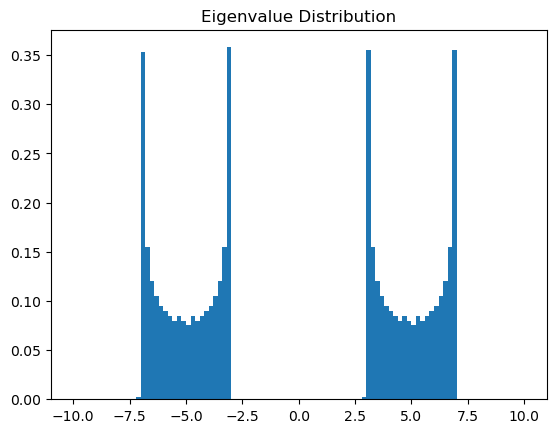

In [4]:
import math
import numpy as np
from numpy.linalg import eigh

L = 1000
rho = 30
kappa = 0.1
disorder = 5


# Constructing H


H = np.diag(np.full(L, disorder)) + np.diag(np.ones(L - 1), k=1) + np.diag(np.ones(L - 1), k=-1)
H[L-1,0] = 1
H[0,L-1] = 1
print(H)


#Constructing X

row_vector = np.linspace(-rho,rho,L)
X = np.zeros((L,L))
X[:] = row_vector
#print(X)

localizer = np.bmat([[-H,kappa * X], [kappa * X, H]])
#print(localizer)


eigvals, eigenvectors = eigh(localizer)

#show histogram of eigenvalues
import matplotlib.pyplot as plt
plt.hist(eigvals, bins=100, range=(-10, 10), density=True)
plt.title('Eigenvalue Distribution')

#take smallest 100 positive eigenvalues



[3.         3.00003948 3.00003948 3.00015791 3.00015791 3.0003553
 3.0003553  3.00063162 3.00063162 3.00098688 3.00098688 3.00142105
 3.00142105 3.00193413 3.00193413 3.00252609 3.00252609 3.0031969
 3.0031969  3.00394654 3.00394654 3.00477499 3.00477499 3.0056822
 3.0056822  3.00666814 3.00666814 3.00773278 3.00773278 3.00887607
 3.00887607 3.01009797 3.01009797 3.01139842 3.01139842 3.01277738
 3.01277738 3.01423479 3.01423479 3.0157706  3.0157706  3.01738474
 3.01738474 3.01907715 3.01907715 3.02084776 3.02084776 3.02269651
 3.02269651 3.02462332 3.02462332 3.02662811 3.02662811 3.02871081
 3.02871081 3.03087133 3.03087133 3.03310959 3.03310959 3.0354255
 3.0354255  3.03781897 3.03781897 3.0402899  3.0402899  3.04283819
 3.04283819 3.04546375 3.04546375 3.04816648 3.04816648 3.05094625
 3.05094625 3.05380298 3.05380298 3.05673653 3.05673653 3.05974681
 3.05974681 3.06283368 3.06283368 3.06599702 3.06599702 3.06923672
 3.06923672 3.07255264 3.07255264 3.07594466 3.07594466 3.07941263

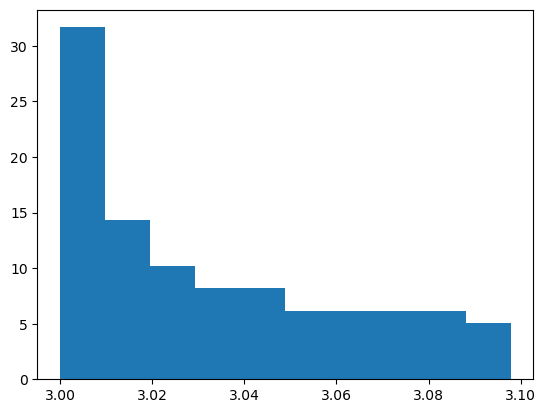

In [9]:
positive_eigvals = eigvals[eigvals > 0]
smallest_100_positive_eigvals = positive_eigvals[:100]

print(smallest_100_positive_eigvals)
plt.hist(smallest_100_positive_eigvals,density=True)
plt.show()

In [ ]:
import scipy.sparse as sp
from scipy.sparse.linalg import eigsh
import numpy as np
import matplotlib.pyplot as plt

def create_localiser(L,rho,kappa,disorder):
    # Function to create the localiser matrix of a 1D Anderson model
    # Note the open boundary conditions
    # This also includes the creation of the position operator X

    # on diagonal disorder
    diag = (np.random.rand(L)-0.5) * disorder
    # off diagonal hopping terms
    off_diag = np.ones(L-1)

    H = sp.diags([off_diag,diag,off_diag],[-1,0,1],shape=(L,L),format='lil')

    #H[L-1,0] = 1
    #H[0,L-1] = 1

    row_vector = np.linspace(-rho,rho,L)
    X = sp.diags(row_vector,0,shape=(L,L),format='csr')

    localiser = sp.bmat([[-H,kappa * X],[kappa * X,H]],format='csr')

    return localiser


def find_eigenvalues(localiser, num_eigenvalues=800):
    # Function to find the positive eigenvalues of the localiser matrix
    # numpy eigsh is best for the sparse case.
    eigvals, eigvecs = eigsh(localiser, k=num_eigenvalues,sigma = 0, which='LM')
    positive_eigvals = eigvals[eigvals > 0]
    return positive_eigvals


def calculate_r(eigvals):
    # Once eigenvalues are found, calculate the r value
    eigvals_s = np.diff(eigvals)
    min_eigvals_s = np.array([min(eigvals_s[i],eigvals_s[i+1]) for i in range(len(eigvals_s)-1)])
    max_eigvals_s = np.array([max(eigvals_s[i],eigvals_s[i+1]) for i in range(len(eigvals_s)-1)])
    r = min_eigvals_s / max_eigvals_s
    return r.sum() / len(r)

    


L = 5000
rho = 30
kappa = 0.1
disorder_values = np.linspace(0,5,11)
num_eigenvalues = 600

print("Calculating r values for different disorder strengths...")
for disorder in disorder_values:
    print(f"Calculating for disorder strength: {disorder}")
    r_values_for_disorder = []
    for i in range(10):
        print(f"  Iteration {i+1}/10")
        localiser = create_localiser(L,rho,kappa,disorder)
        positive_eigvals = find_eigenvalues(localiser, num_eigenvalues)
        r = calculate_r(positive_eigvals)
        print(f"   r value for {i+1}th iteration: {r}")
        r_values_for_disorder.append(r)
    print(f"Disorder: {disorder}, r: {np.mean(r_values_for_disorder)}")





KeyboardInterrupt: 

In [4]:
print(localiser)

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 24000 stored elements and shape (6000, 6000)>
  Coords	Values
  (0, 0)	-5.0
  (0, 1)	-1.0
  (0, 2999)	-1.0
  (0, 3000)	-3.0
  (1, 0)	-1.0
  (1, 1)	-5.0
  (1, 2)	-1.0
  (1, 3001)	-2.9979993331110375
  (2, 1)	-1.0
  (2, 2)	-5.0
  (2, 3)	-1.0
  (2, 3002)	-2.995998666222074
  (3, 2)	-1.0
  (3, 3)	-5.0
  (3, 4)	-1.0
  (3, 3003)	-2.993997999333111
  (4, 3)	-1.0
  (4, 4)	-5.0
  (4, 5)	-1.0
  (4, 3004)	-2.9919973324441482
  (5, 4)	-1.0
  (5, 5)	-5.0
  (5, 6)	-1.0
  (5, 3005)	-2.9899966655551853
  (6, 5)	-1.0
  :	:
  (5993, 5994)	1.0
  (5994, 2994)	2.9899966655551844
  (5994, 5993)	1.0
  (5994, 5994)	5.0
  (5994, 5995)	1.0
  (5995, 2995)	2.9919973324441482
  (5995, 5994)	1.0
  (5995, 5995)	5.0
  (5995, 5996)	1.0
  (5996, 2996)	2.9939979993331107
  (5996, 5995)	1.0
  (5996, 5996)	5.0
  (5996, 5997)	1.0
  (5997, 2997)	2.9959986662220737
  (5997, 5996)	1.0
  (5997, 5997)	5.0
  (5997, 5998)	1.0
  (5998, 2998)	2.9979993331110366
  (5998, 

In [ ]:
import scipy.sparse as sp
from scipy.sparse.linalg import eigsh
import numpy as np
import matplotlib.pyplot as plt
import multiprocessing
multiprocessing.set_start_method('spawn', force=True)
from multiprocessing import Pool

def create_localiser(L,rho,kappa,disorder):
    # Function to create the localiser matrix of a 1D Anderson model
    # Note the open boundary conditions
    # This also includes the creation of the position operator X

    # on diagonal disorder
    diag = (np.random.rand(L)-0.5) * disorder
    # off diagonal hopping terms
    off_diag = np.ones(L-1)

    H = sp.diags([off_diag,diag,off_diag],[-1,0,1],shape=(L,L),format='lil')

    #H[L-1,0] = 1
    #H[0,L-1] = 1

    row_vector = np.linspace(-rho,rho,L)
    X = sp.diags(row_vector,0,shape=(L,L),format='csr')

    localiser = sp.bmat([[-H,kappa * X],[kappa * X,H]],format='csr')

    return localiser


def find_eigenvalues(localiser, num_eigenvalues=800):
    # Function to find the positive eigenvalues of the localiser matrix
    # numpy eigsh is best for the sparse case.
    eigvals, eigvecs = eigsh(localiser, k=num_eigenvalues,sigma = 0, which='LM')
    positive_eigvals = eigvals[eigvals > 0]
    return positive_eigvals



# Calculate the adjacent gap ratio r = min(s_i,s_(i+1))/max(s_i,s_(i+1))
def calculate_r(eigvals):
    # Once eigenvalues are found, calculate the r value
    eigvals_s = np.diff(eigvals)
    min_eigvals_s = np.array([min(eigvals_s[i],eigvals_s[i+1]) for i in range(len(eigvals_s)-1)])
    max_eigvals_s = np.array([max(eigvals_s[i],eigvals_s[i+1]) for i in range(len(eigvals_s)-1)])
    r = min_eigvals_s / max_eigvals_s
    return r.mean()


def calculate_z(eigvals):    
    eigvals = sorted(eigvals)
    z = np.zeros(len(eigvals)-4)
    for i in range(2,len(eigvals)-2):
        if abs(eigvals[i+1] - eigvals[i]) < abs(eigvals[i]-eigvals[i-1]):
            nn = abs(eigvals[i+1] - eigvals[i])
            nnn = min(min(abs(eigvals[i]-eigvals[i-1]),abs(eigvals[i+2]-eigvals[i])),abs(eigvals[i-2]-eigvals[i]))
        else:
            nn = abs(eigvals[i]-eigvals[i-1])
            nnn = min(min(abs(eigvals[i+1]-eigvals[i]),abs(eigvals[i-2]-eigvals[i])),abs(eigvals[i+2]-eigvals[i]))
        z[i-2] = nn/nnn
    return z.mean()



def single_iteration(args):
    L, rho, kappa, disorder, i = args
    localiser = create_localiser(L,rho,kappa,disorder)
    positive_eigvals = find_eigenvalues(localiser, L//5)
    r = calculate_r(positive_eigvals)
    z = calculate_z(positive_eigvals)
    print(f"   r value for {i+1}th iteration: {r}")
    print(f"   z value for {i+1}th iteration: {z}")
    return r

L_values = [500,1000]
rho = 30
kappa = 0.1
disorder_values = np.linspace(0.5,5,10)
num_iter = 30



print("Calculating r values for different disorder strengths and system sizes")
print("First L/5 eigenvalues are used to calculate r")
results = [[] for _ in L_values]
if __name__ == '__main__':
    with Pool() as pool:
        for L in L_values:
            print(f"System size L: {L}")
            for disorder in disorder_values:

                args_list = [(L,rho,kappa,disorder,i) for i in range(num_iter)]

                r_values_for_disorder = pool.map(single_iteration,args_list)
                results[L_values.index(L)].append((disorder,np.mean(r_values_for_disorder),np.std(r_values_for_disorder)))
                print(f"Disorder: {disorder}, r: {np.mean(r_values_for_disorder)}")


#save results to file
    with open("1dplay_results.txt","w") as f:
        for i,L in enumerate(L_values):
            f.write(f"System size L: {L}\n")
            f.write("Disorder,r,stderr\n")
            for disorder,mean, stdev in results[i]:
                f.write(f"{disorder},{mean},{stdev}\n")
            f.write("\n")

    #plot results
    for i,L in enumerate(L_values):
        disorders = [disorder for disorder, mean, stdev in results[i]]
        r_values = [mean for disorder, mean, stdev in results[i]]
        stderr_values = [stdev for disorder, mean, stdev in results[i]]
        plt.errorbar(disorders,r_values,yerr=stderr_values,label=f"L={L}",marker='o',capthick=2)

    plt.xlabel("Disorder Strength")
    plt.ylabel("r value")
    plt.title("r value vs Disorder Strength for different System Sizes")
    plt.legend()
    plt.grid()
    plt.savefig("1dplay_r_vs_disorder.png",dpi=300)
    plt.show()



# for L in L_values:
#     print(f"System size L: {L}")
#     for disorder in disorder_values:
#         print(f"Calculating for disorder strength: {disorder}")
#         r_values_for_disorder = []
#         for i in range(num_iter):
#             print(f"  Iteration {i+1}/10")
#             localiser = create_localiser(L,rho,kappa,disorder)
#             positive_eigvals = find_eigenvalues(localiser, L/5)
#             r = calculate_r(positive_eigvals)
#             print(f"   r value for {i+1}th iteration: {r}")
#             r_values_for_disorder.append(r)
#         print(f"Disorder: {disorder}, r: {np.mean(r_values_for_disorder)}")




Calculating r values for different disorder strengths and system sizes
First L/5 eigenvalues are used to calculate r
System size L: 500


Process SpawnPoolWorker-49:
Traceback (most recent call last):
  File "/usr/lib64/python3.9/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/usr/lib64/python3.9/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
  File "/usr/lib64/python3.9/multiprocessing/pool.py", line 114, in worker
    task = get()
  File "/usr/lib64/python3.9/multiprocessing/queues.py", line 367, in get
    return _ForkingPickler.loads(res)
AttributeError: Can't get attribute 'single_iteration' on <module '__main__' (built-in)>
Process SpawnPoolWorker-50:
Process SpawnPoolWorker-51:
Process SpawnPoolWorker-52:
Process SpawnPoolWorker-53:
Process SpawnPoolWorker-54:
Process SpawnPoolWorker-55:
Process SpawnPoolWorker-56:
Process SpawnPoolWorker-57:
Process SpawnPoolWorker-58:
Traceback (most recent call last):
  File "/usr/lib64/python3.9/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/usr/lib64/python3.9/multiprocessi